# 2D Ising model with MC. 
2020.09.09 Group meeting
<hr>

## theory
$$ 
H = -J\sum_{<ij>} S_i S_j, S_i = \pm 1
$$
Let J = 1 and h = 0 (No external magnetic field). Ferromagnetic behaviour.

### Packages

In [47]:
import numpy as np
#import pandas as pd
from matplotlib import pyplot as plt

### Useful functions

In [48]:
#generate random spin configuration. 
def initial(L):
    config = 2*np.random.randint(2, size = (L,L)) - 1 #spin은 +1 or -1
    return config


#Monte carlo algorithm
def mcmh(config, temp):
    L = int(np.sqrt(config.size))
    for i in range(L):
        for j in range(L):
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            s = config[x,y]  
            neigh = config[(x+1)%L, y] + config[x,(y+1)%L] + config[(x-1)%L,y] + config[x,(y-1)%L] #4 neibor spins
            DE = 2 * s * neigh #E(flip) - E(before)(-가 들어가야 하는데 넣으면 이상하다..)
            
            #accept and rejection process
            if DE < 0:
                s *= -1 #flip spin if dE < 0
            elif np.random.rand() < np.exp(- DE*1/temp):
                s *= -1 #flip spin when dE > 0 only when exp(-dE/T) > random_number with 1 >= random_number >= 0 from detaied balance
            config[x,y] = s
    return config


#Calculate energy of given configuration
def energy(config):
    L = int(np.sqrt(config.size))
    H = 0
    for i in range(len(config)):
        for j in range(len(config)):
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            s = config[x,y] 
            neigh = config[(x+1)%L, y] + config[x,(y+1)%L] + config[(x-1)%L,y] + config[x,(y-1)%L]
            H += - neigh * s
    return H/4

#magnetization
def magnetization(config):
    magnet = np.sum(config)
    return magnet

# testing part to calculate free energy(미완성)

$2^{784}$개의 spin configuration을 전부 세는 것은 어떻게? 

In [37]:
#all possible spin configurations <- 구할 수가 없다... 이전 코드는 small N에 대해서도 에러가 남..
#더 쉽게 풀 수 있는 방법...
#Z sigma(exp^{-beta * E})

### System size and the number of iterations

In [58]:
L = 28; #system의 가로or세로 spin의 개수(N = L*L)
equilsteps = 1000; #np.power(2,L);?equilibrium으로 만들기 위한 steps
mcsteps = 1000; #np.power(2,L);? #mcmh를 몇번 iterate할지 결정

dT = 50; #temperature T의 변화 steps
T = np.linspace(2.0, 4.0, dT) #관심있는 온도범위(critical temperature ~ 2.269)
T2 = np.linspace(2.0, 4.0, dT)

n1, n2  = 1.0/(mcsteps*L*L), 1.0/(mcsteps*mcsteps*L*L) 

## Main1(thermodynamic quantities near critical temperature)
$T_c = 2.6918$ <br>
$C_v = \frac{\partial U}{\partial T}$ <- 아직 해결하지 못했습니다.

In [ ]:
#energy and magnetization
EN = []
MA = []
for tt in range(dT):
    E, M = 0, 0;
    config = initial(L);
    
    for i in range(equilsteps): # spin configuration을 equilbrium state로 만듦.
        mcmh(config, T[tt])
    
    for j in range(mcsteps): #spin을 마구 뒤집어가면서 (average)energy, magnetization등을 구함
        mcmh(config, T[tt])
        Energy = energy(config);
        Mag = magnetization(config);
        
        E += Energy;
        M += Mag;
        
    EN.append(E) #한 spin당 평균 에너지
    MA.append(M) #한 spin당 평균 magnetization


'''
#specific heat
Cv = []
for i in range(dT-1):
    delta = 1/dT;
    cv = (EN[i+1] - EN[i])/delta;
    Cv.append(cv)
'''

## Main2(Free energy) - 미완성
### 길한씨게 드려야할 정보..

In [1]:
#true free energy를 어떻게 하면 찾을 수 있을까?
#모든 configuration을 찾는건 미련하다. 2^784개의 comfiguration의 energy를 찾아야 하니까.
# transfer matrix를 찾는것도 매우 어려워 보인다..
#직접 다 찾는게 좋은 방법인지?

## Plots

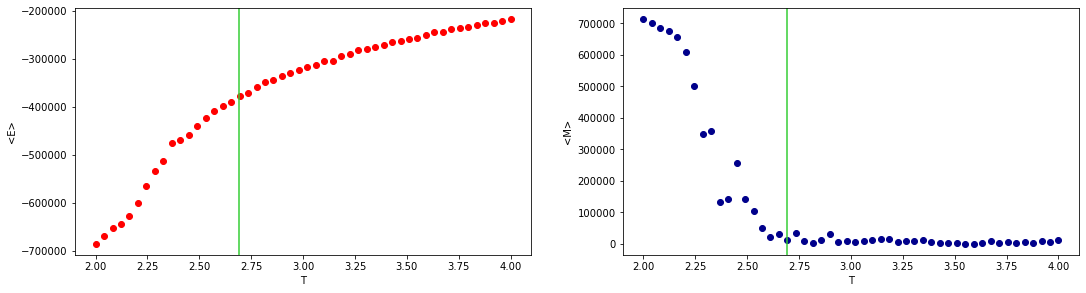

In [61]:
%matplotlib inline
f = plt.figure(figsize=(18,10));

sp = f.add_subplot(2,2,1);
plt.scatter(T, EN, marker = 'o', color = 'red')
plt.axvline(x = 2.6918, color = 'limegreen')
plt.xlabel("T");
plt.ylabel("<E>");
plt.axis('tight');

sp = f.add_subplot(2,2,2);
plt.scatter(T, MA, marker='o', color = 'darkblue')
plt.axvline(x = 2.6918, color = 'limegreen')
plt.xlabel("T")
plt.ylabel("<M>");
plt.axis('tight');

plt.savefig('energy and magnetization')

### Figures